## Wat moet er gerapporteerd kunnen worden?
- Oplosgraad incidenten
- Oplosgraad door KIR-team
- Splitsing tussen GEO, AM en Infrax

In [1]:
import pandas as pd

#### Download lijst incidenten vanuit Xtraction: 
- 'Folders' --> 'Shared Folders' --> 'Incident' --> 'Incident Resultaten Support Team (historiek)'
- Kijk manueel na:
    *Indien nodig, wijzig Resolution Group Name naar 'GEO' of 'AM'
    *Indien nodig, voeg de incidenten toe die nog niet zijn afgesloten

In [2]:
# Import historiek incident resultaten en mergen
geo = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (GEO).xlsx"
am = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (AM).xlsx"
incidenten_geo = pd.read_excel(geo, sheet_name='Afgesloten incidenten (lijst)', header=2)
incidenten_am = pd.read_excel(am, sheet_name='Afgesloten incidenten (lijst)', header=2)

incidenten = incidenten_geo.append(incidenten_am, ignore_index=True)
incidenten.dropna(inplace=True, how='all')

In [3]:
# Overbodige kolommen verwijderen
labels = ["CI", "Assign Count", "Customer Resolution Html", "Is VIP?", 
          "Date Last Closed", "Assigned Group", "Assigned To"]
incidenten = incidenten.drop(labels, axis=1)
incidenten.head()

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User
0,327601,Email,Yes,Priority 4,Standalonemap stopped working.,64-bit PC is in orde gebracht en zal in de loo...,EAN4460 Geoview / geolis / geolig / Elont meld...,GCJ099 - Kristof Baele,2017-12-07 16:33:02,2018-12-18 13:00:48,Closed,Appl Netten GEO,QTP864 - Ken Bergers
1,347758,Email,Yes,Priority 4,Vervolg Incident - 339760 probleem met Geomobi...,Ik gebruik geomobix niet meer wegens te lang w...,EAN1306 Geomobile andere incidenten,IOJ833 - Jimmy Aerts,2018-05-22 06:12:49,2018-10-22 12:48:11,Closed,Appl Netten GEO,BJF331 - Joris Vanderloock
2,348413,Email,Yes,Priority 4,COMPASS : LADEN CRAB DATA,Correcties worden dmv DBA script uitgevoerd op...,EAN1197 CompassTV andere incidenten,FFC031 - Ann Lemiere,2018-05-25 12:43:39,2018-06-01 13:30:11,Closed,Appl Netten GEO,GAH048 - Gert Van Dyck
3,348801,Phone,No,Priority 4,Lijn kan enkel verticaal of horizontaal geposi...,AccuDraw,EAN1303 GeoLis functionele vragen,HEW921 - Pieterjan Verhaegen,2018-05-29 09:19:06,2018-05-30 11:39:24,Closed,Appl Netten GEO,ERN417 - Marieke Algoed
4,349106,Phone,No,Priority 3,Request - 1014975: Geolis - wijzigen plannen -...,aanvraag werd goed gekeurd,EAN3745 Landesk - Mijn ICT-Tools - Statusupdat...,ECE480 - Rob De Coene,2018-05-30 12:53:28,2018-05-31 09:12:40,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe


In [4]:
incidenten.shape

(1723, 13)

In [5]:
# Convert to datetime
from datetime import datetime
import re

try:
    incidenten["Date Created"] = incidenten["Date Created"].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M"))
except TypeError:
    print("Striptime already done!")

Striptime already done!


In [6]:
# Filter on dates
incidenten = incidenten[(incidenten["Date Created"] > '2019-05-01') & (incidenten["Date Created"] < '2019-06-01')]

In [7]:
incidenten[incidenten["Resolution Group Name"]=="Appl Netten GEO"]["Date Created"].tail()

1425   2019-05-02
1426   2019-05-02
1427   2019-05-02
1428   2019-05-02
1429   2019-05-02
Name: Date Created, dtype: datetime64[ns]

In [8]:
incidenten.shape

(221, 13)

In [9]:
incidenten["Article"].unique()

array(['EAN2870 GIPOD andere incidenten',
       'EAN2258 GeoView GeoLis andere incidenten',
       'EAN3664 Website Eandis - GON Stroomonderbrekingen',
       'EAN1203 AutoCAD andere incidenten',
       'INF130 Smallworld GIS - andere incidenten',
       'EAN1233 Elont andere incidenten',
       'EAN3341 Geolig andere incidenten',
       'EAN0033 GeoView Geolis Verkeerde referentiekaart bij opstart',
       'EAN1234 Elont functionele vragen',
       'INF129 Smallworld PNI voor fiberbeheer - andere incidenten',
       'EAN4460 Geoview / geolis / geolig / Elont melding: " MapStandalone stopped working "',
       'EAN1366 Nemesis Middenspanning andere incidenten',
       'EAN1303 GeoLis functionele vragen',
       'EAN2869 GIPOD functionele vragen',
       'EAN4746 Windows 10 NDIS incidenten n.a.v. migratie',
       'EAN3676 Landesk - Mijn ICT-Tools - Incident na uitvoering van RFS aanvraag',
       'EAN1357 Nemesis Gas andere incidenten',
       'EAN0002 AutoCAD Omzetten van een DWG-fil

In [10]:
incidenten[incidenten["Resolution Group Name"]=='Appl Netten GEO']["Resolution User"].value_counts()

QTP864 - Ken Bergers            91
PSZ834 - Thomas Bredenoord      39
PCK830 - Els  De Roeck          18
GHG127 - Anneleen Robbe         15
GEO                             11
NQB004 - Gerrie van den Boom     7
GBE165 - Gunther Daneels         2
GAH048 - Gert Van Dyck           2
LZM524 - Bernhard Bannink        2
LRD904 - Joachim Boerjan         1
Name: Resolution User, dtype: int64

In [11]:
# Splitsen in AM en GEO incidenten
AM_apps = ["nemesis", "pq", "ov web", "straatlampen", "nemora", "wevab", "iq plus", "ttg", "visa", "encore"]
teamgeo = ['GHG127 - Anneleen Robbe', 'BJF331 - Joris Vanderloock', 'GAH048 - Gert Van Dyck',
           'GHF281 - Didier Van Belleghem', 'JAD401 - Nick Ceulemans',
           'ERN417 - Marieke Algoed', 'PPC524 - Katrien Verbeek',
           'PPC524 - Katrien Verbeek', 'GBE165 - Gunther Daneels',
           'LZM524 - Bernhard Bannink', 'PNF248 - Erwin Munters', 'PSZ834 - Thomas Bredenoord', 'GEO']

for i in incidenten.index:
    article = str(incidenten.loc[i, "Article"]).lower()
    user = str(incidenten.loc[i, "Resolution User"])
    resolution_group_name = incidenten.loc[i, "Resolution Group Name"]
    if (user in teamgeo) or resolution_group_name == 'GEO':
        incidenten.loc[i, "Resolution Group Name"] = 'GEO'
    elif (any(app in article for app in AM_apps) and (user not in teamgeo)) or user == 'AM' or resolution_group_name == 'AM':
        incidenten.loc[i, "Resolution Group Name"] = 'AM'
    else:
        incidenten.loc[i, "Resolution Group Name"] = 'GEO'

In [12]:
incidenten.loc[1212, "Resolution Group Name"]

'GEO'

In [13]:
incidenten["Resolution Group Name"].value_counts()

GEO    182
AM      39
Name: Resolution Group Name, dtype: int64

In [14]:
incidenten[incidenten["Resolution Group Name"]=='AM']["Resolution User"].value_counts()

QTP864 - Ken Bergers              31
AM                                 3
GMQ011 - Willem Fouquart           2
HAC226 - Alain Van den Abbeele     2
PCK830 - Els  De Roeck             1
Name: Resolution User, dtype: int64

In [15]:
# Dit artikel zit automatisch bij GEO. Kijk na of er geen opvallend groot aantal AM gevallen zijn
incidenten[incidenten["Article"]=='EAN0834 EAI melding Operaties & Monitoring']["Summary"].value_counts()

MF190 (DoorgevenUpdateInterventie) bericht in error                          1
MF1301 (WijzigAdres) bericht in error                                        1
MF190 (DoorgevenUpdateInterventie) berichten in error                        1
PADMF192 (Website stroomonderbrekingen) job in error sinds 03:20 op 27/05    1
GTDGPDWO (Ophalen GIPOD werkopdrachten) job in error                         1
GTHCAFTD (CallAFTD) job en MF864 berichten in error                          1
Name: Summary, dtype: int64

In [16]:
# Kijk na of alle Infrax collega's zijn toegevoegd in de lijst
infrax_collegas = ["LZM524", "NQB004", "PJS862", "PNF248", "RHC604", "PSZ834", "I"]
incidenten["Resolution User"].unique()

array(['GEO', 'PCK830 - Els  De Roeck', 'QTP864 - Ken Bergers',
       'PSZ834 - Thomas Bredenoord', 'NQB004 - Gerrie van den Boom',
       'LZM524 - Bernhard Bannink', 'GHG127 - Anneleen Robbe',
       'GAH048 - Gert Van Dyck', 'AM', 'LRD904 - Joachim Boerjan',
       'GBE165 - Gunther Daneels', 'GMQ011 - Willem Fouquart',
       'HAC226 - Alain Van den Abbeele'], dtype=object)

In [17]:
# Toevoegen Infrax Groep
for i in incidenten.index:
    user = str(incidenten.loc[i, "Resolution User"])[0:6]
    if user in infrax_collegas:
        incidenten.loc[i, "Resolution Group Name"] = "I"

incidenten["Resolution Group Name"].value_counts()

GEO    134
I       48
AM      39
Name: Resolution Group Name, dtype: int64

In [18]:
# Toevoegen KIR kolom
incidenten["KIR"] = 0
KIR = ["QTP864", "PCK830", "LRD904"] 
for i in incidenten.index:
    user = str(incidenten.loc[i, "Resolution User"])[0:6]
    if user in KIR:
        incidenten.loc[i, "KIR"] = 1

incidenten["KIR"].value_counts()

1    135
0     86
Name: KIR, dtype: int64

In [19]:
# Controleer of er geen incidenten foutief in groep AM zitten
incidenten[incidenten["Resolution Group Name"]=="AM"]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
1229,425427,Phone,No,Priority 4,"Ongeldig element foutmelding ""Link met Geo"" in...",Userinstellingen reset in U:\APPSDATA\GeoWorks...,EAN1366 Nemesis Middenspanning andere incidenten,CHB489 - Henk Verplancke,2019-05-06 08:41:14,2019-05-07 10:46:31,Closed,AM,PCK830 - Els De Roeck,1
1243,426284,Phone,No,Priority 4,Inladen van excel bestand in Nemesis Gas lukt ...,Gezien we al enige tijd geen feedback meer heb...,EAN1357 Nemesis Gas andere incidenten,BCE089 - Laurens Timperman,2019-05-07 14:03:14,2019-05-21 17:27:44,Closed,AM,QTP864 - Ken Bergers,1
1263,427010,Email,No,Priority 4,deactivatie assets OV - net 20246416,Script uitgevoerd,EAN3507 OV WEB andere incidenten,FHA184 - Sabine Demeulenaere,2019-05-08 19:54:16,2019-05-15 11:01:11,Closed,AM,QTP864 - Ken Bergers,1
1271,427273,Phone,No,Priority 3,Ticket blijft hangen in TTG.,edit TTG.TT_INTERV_agt where s_interv in (2055...,EAN2399 UNITTG - TTG afmelden ticket mislukt,DGJ307 - Greet Dumoleyn,2019-05-09 10:57:55,2019-05-09 11:58:21,Closed,AM,QTP864 - Ken Bergers,1
1272,427276,Phone,No,Priority 3,Ticket blijft hangen in TTG.,edit TTG.TT_INTERV_agt where s_interv in (2055...,EAN2399 UNITTG - TTG afmelden ticket mislukt,DGJ307 - Greet Dumoleyn,2019-05-09 10:58:45,2019-05-09 11:59:58,Closed,AM,QTP864 - Ken Bergers,1
1274,427379,Phone,No,Priority 4,You do not have the Content Server browser ext...,Internet Explorer als default browser ingestel...,EAN1434 Wevab andere incidenten,GBA146 - Silke Cuvron,2019-05-09 13:47:59,2019-05-09 15:14:23,Closed,AM,QTP864 - Ken Bergers,1
1275,427468,Phone,No,Priority 4,Foto's inbrengen lukt niet - Nemesis Middenspa...,Opgelost door een onbekende reden,EAN1366 Nemesis Middenspanning andere incidenten,GAD015 - Peter De Smijter,2019-05-09 15:05:20,2019-05-17 09:23:13,Closed,AM,QTP864 - Ken Bergers,1
1294,427811,Phone,No,Priority 4,windows script host fout bij opstarten Start_W...,Reeds opgelost door de Hulplijn,EAN1434 Wevab andere incidenten,FGD027 - Daisy Naessens,2019-05-10 11:27:47,2019-05-13 09:13:48,Closed,AM,QTP864 - Ken Bergers,1
1296,427902,Phone,No,Priority 4,Steunen uit dossier halen.,De steunen kunnen niet verwijderd worden omdat...,EAN3507 OV WEB andere incidenten,GCJ126 - Tom Van Lommel,2019-05-10 14:08:03,2019-05-15 08:57:23,Closed,AM,QTP864 - Ken Bergers,1
1297,427938,Phone,No,Priority 4,Automatische mail wordt verstuurd via lotus no...,Gezien we reeds geruime tijd geen feedback mee...,EAN1366 Nemesis Middenspanning andere incidenten,MJK394 - Mieke Pierlet,2019-05-10 14:56:14,2019-05-29 11:13:08,Closed,AM,QTP864 - Ken Bergers,1


In [20]:
# Functie om plot aan te maken
import matplotlib.pyplot as plt
from numpy import arange

periode = 'MEI 2019' # Eventueel aanpassen!

plt.rcParams["font.family"] = "serif"

textfont = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'size': 28,
        }

def barplot(series, barwidth, xlabel, ylabel, pngname, plottitle):
    proportie = [int(round(x/series.sum()*100, 0)) for x in series]
    fig = plt.figure(figsize=(24, 10))
    ax = fig.add_subplot(1,1,1)
    bar_positions = arange(len(series.values)) + 1
    ax.bar(bar_positions, series.values, width=barwidth)
    tick_positions = range(1,(len(series.values)+1))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(series.index)
    ax.set_xlabel(xlabel, fontsize=24)
    ax.set_ylabel(ylabel, fontsize=24)
    ax.tick_params(labelsize=28)
    ax.set_title(plottitle, fontsize=32, pad=45, fontweight='bold') # Titel van plot
    for i, v in enumerate(proportie): # Label propotie bovenop bar
        ax.text(i+1, series[i]+(0.01*max(series.values)), str(v)+"%", horizontalalignment='center', color='black', fontdict=textfont)
    for i, v in enumerate(series): # Label aantal incidenten 
        ax.text(i+1, series[i]+(-0.05*max(series.values)), str(v), horizontalalignment='center', color='black', fontsize=28)
    ax.set_frame_on(b=False)
    today = datetime.today().strftime('%Y%m%d')
    plt.savefig(pngname+"_"+today+".png") # Exporteren plot naar png
    plt.show() 

incident_by_team = incidenten.groupby(by=["Resolution Group Name"]).count()["Incident ID"]

barplot(incident_by_team, 0.5, "Team", "Aantal incidenten", "incidentsPerTeam", "Incidenten "+periode)

<Figure size 2400x1000 with 1 Axes>

In [21]:
#incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
#incidenten_ean_KIR = incidenten_ean.groupby(by=["KIR"]).count()["Incident ID"]
#barplot(incidenten_ean_KIR, 0.5, "Opgelost door KIR=1", "Aantal incidenten", "incidentByKIR_GeoAM", "Incidenten GEO+AM-Infrax sep-dec 2018")

In [22]:
#incidenten_eanAM_KIR = incidenten[incidenten["Resolution Group Name"]=="AM"].groupby(by=["KIR"]).count()["Incident ID"]
#barplot(incidenten_eanAM_KIR, 0.5, "Opgelost door KIR=1", "Aantal incidenten", "incidentByKIR", "Incidenten AM sep-dec 2018")

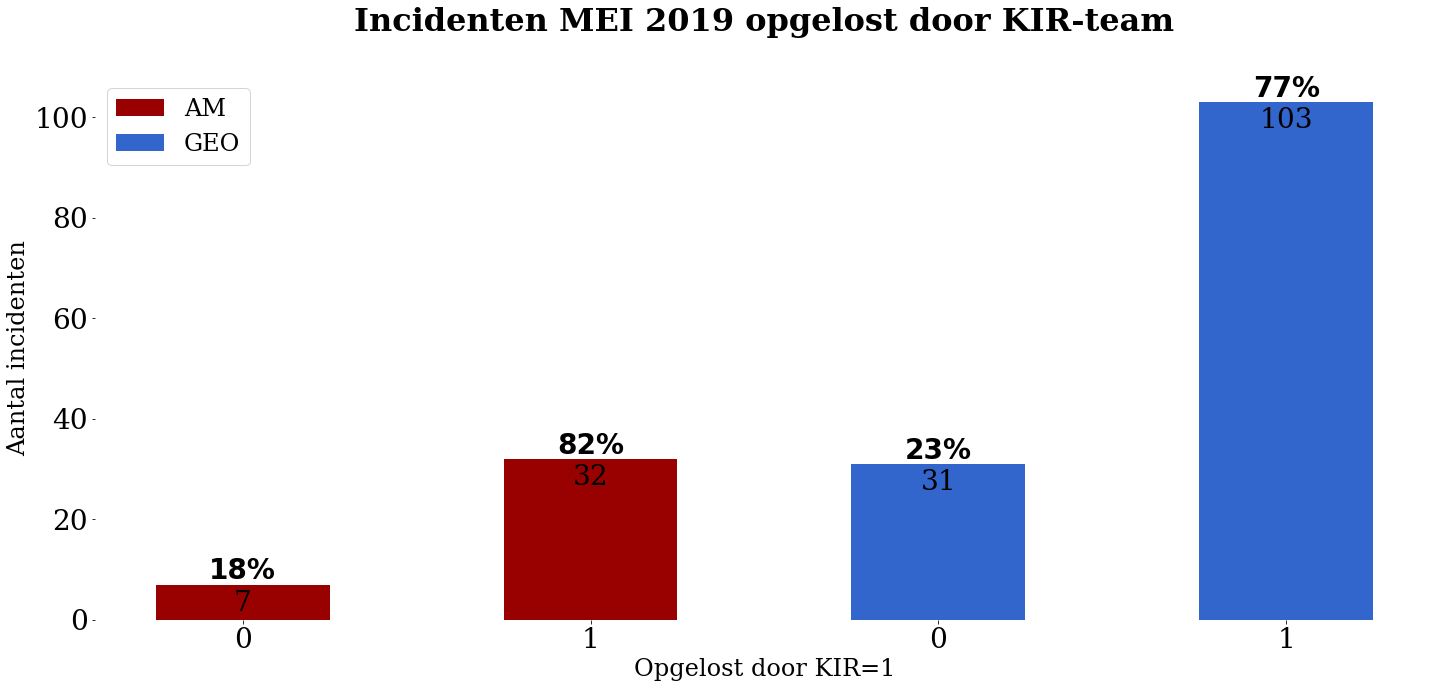

In [23]:
incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
incidenten_ean_GeoAM = incidenten_ean.groupby(by=["Resolution Group Name", "KIR"]).count()["Incident ID"]

# Bereken verhouding incidenten opgelost door KIR per team
proportie = []
for i, amount in incidenten_ean_GeoAM.items():
    if i[0] == "AM":
        som = sum(incidenten_ean_GeoAM["AM"])   
    else:
        som = sum(incidenten_ean_GeoAM["GEO"])
    verhouding = int(round(amount/som*100,0)) #'round' om correct af te ronden
    proportie.append(verhouding)

# Plot aantal incidenten opgelost door KIR-team
barcolors = ["#990000", "#990000", "#3366cc", "#3366cc"]
fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(4) + 1
bar = ax.bar(bar_positions, incidenten_ean_GeoAM.values, width=0.5, color=barcolors)
tick_positions = range(1,5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(incidenten_ean_GeoAM.index.get_level_values(1))
ax.set_xlabel("Opgelost door KIR=1", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
ax.set_title("Incidenten "+periode+" opgelost door KIR-team", fontsize=32, pad=45, fontweight='bold') # Titel van plot
for i, v in enumerate(incidenten_ean_GeoAM):
    ax.text(i+1, v+(0.01*max(incidenten_ean_GeoAM.values)), str(proportie[i])+"%", 
            horizontalalignment='center', color='black', fontdict=textfont)
for i, v in enumerate(incidenten_ean_GeoAM): # Label aantal incidenten 
        ax.text(i+1, incidenten_ean_GeoAM[i]+(-0.05*max(incidenten_ean_GeoAM.values)), 
                str(v), horizontalalignment='center', color='black', fontsize=28)
ax.set_frame_on(b=False)
ax.legend(bar[1:3], ["AM", "GEO"], loc=2, prop={'size': 24})
today = datetime.today().strftime('%Y%m%d')
plt.savefig("incidentsOpgelostDoorKIR_"+today+".png")
plt.show()


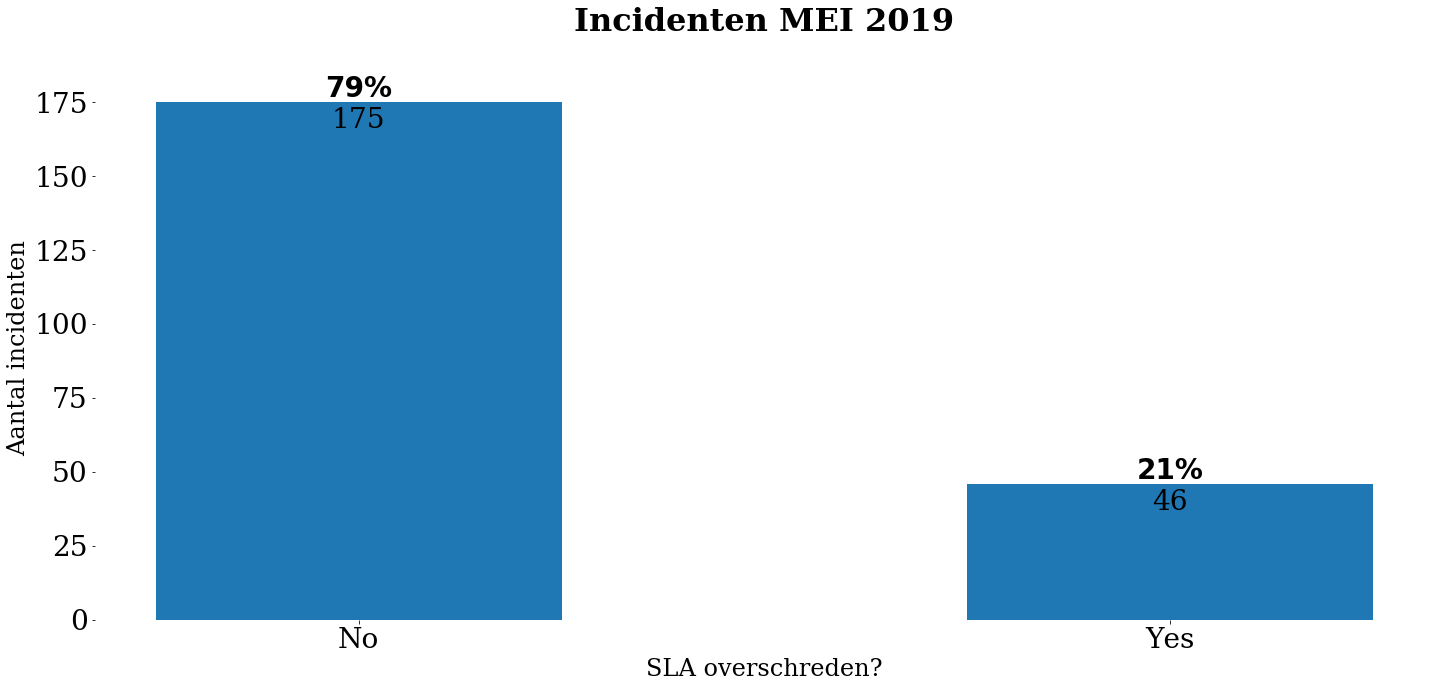

In [24]:
breached_incidenten = incidenten.groupby(by=["Is Breached"]).count()["Incident ID"]
barplot(breached_incidenten, 0.5, "SLA overschreden?", "Aantal incidenten", "incidentsBreached", "Incidenten "+periode)

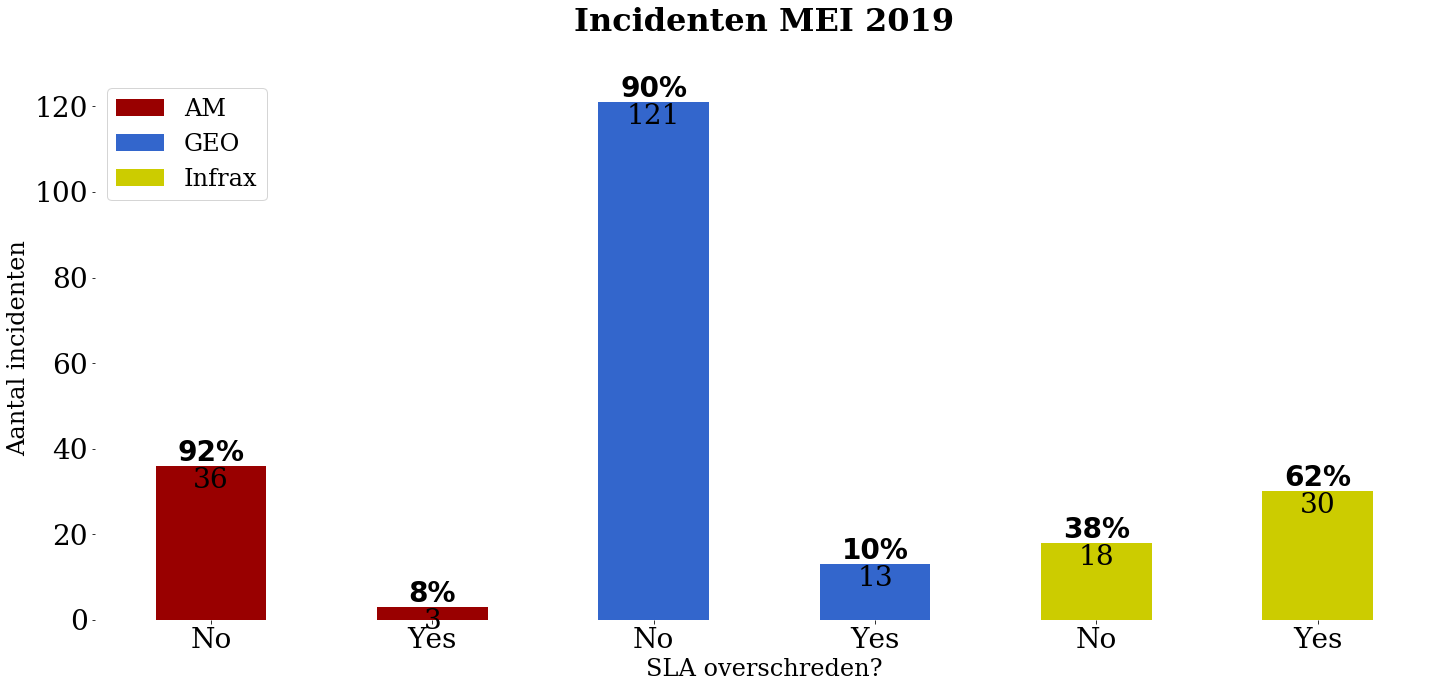

In [25]:
#incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
grouped_incidenten = incidenten.groupby(by=["Resolution Group Name", "Is Breached"]).count()["Incident ID"]

# Bereken verhouding breached incidenten per team
proportie = []
for i, amount in grouped_incidenten.items():
    if i[0] == "AM":
        som = sum(grouped_incidenten["AM"])   
    elif i[0] == "GEO":
        som = sum(grouped_incidenten["GEO"])
    else:
        som = sum(grouped_incidenten["I"])
    verhouding = int(round(amount/som*100,0)) #'round' om correct af te ronden
    proportie.append(verhouding)

# Plot aantal incidenten opgelost door KIR-team
barcolors = ["#990000", "#990000", "#3366cc", "#3366cc", "#cccc00", "#cccc00"]
fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(6) + 1
bar = ax.bar(bar_positions, grouped_incidenten.values, width=0.5, color=barcolors)
tick_positions = range(1,7)
ax.set_xticks(tick_positions)
ax.set_xticklabels(grouped_incidenten.index.get_level_values(1))
ax.set_xlabel("SLA overschreden?", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
ax.set_title("Incidenten "+periode, fontsize=32, pad=45, fontweight='bold') # Titel van plot
for i, v in enumerate(grouped_incidenten):
    ax.text(i+1, v+(0.01*max(grouped_incidenten.values)), str(proportie[i])+"%", 
            horizontalalignment='center', color='black', fontdict=textfont)
for i, v in enumerate(grouped_incidenten): # Label aantal incidenten 
        ax.text(i+1, grouped_incidenten[i]+(-0.05*max(incidenten_ean_GeoAM.values)), 
                str(v), horizontalalignment='center', color='black', fontsize=28)
ax.set_frame_on(b=False)
ax.legend(bar[::2], ["AM", "GEO", "Infrax"], loc=2, prop={'size': 24})
today = datetime.today().strftime('%Y%m%d')
plt.savefig("incidentsBreachedPerTeam"+today+".png")
plt.show()


In [26]:
"""
incident_by_team_complex = jul_aug.groupby(by=["Groep", "Complexiteit"]).count()["Incident ID"]
proportie = [int(x/incident_by_team_complex.sum()*100) for x in incident_by_team_complex]

barcolors = ["#990000", "#990000", "#990000", "#990000", "#3366cc", "#3366cc", "#3366cc", "#3366cc", "#cccc00"]

fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(9) + 1
ax.bar(bar_positions, incident_by_team_complex.values, width=0.5, color=barcolors)
tick_positions = range(1,10)
ax.set_xticks(tick_positions)
ax.set_xticklabels(incident_by_team_complex.index)
ax.set_xlabel("('Team', 'Complexiteit')", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
for i, v in enumerate(incident_by_team_complex):
    ax.text(i+1, v+(0.01*max(incident_by_team_complex.values)), str(proportie[i])+"%", horizontalalignment='center', color='black', fontdict=textfont)
ax.set_frame_on(b=False)
plt.savefig("incident_by_team_complex.png")
plt.show()
"""

'\nincident_by_team_complex = jul_aug.groupby(by=["Groep", "Complexiteit"]).count()["Incident ID"]\nproportie = [int(x/incident_by_team_complex.sum()*100) for x in incident_by_team_complex]\n\nbarcolors = ["#990000", "#990000", "#990000", "#990000", "#3366cc", "#3366cc", "#3366cc", "#3366cc", "#cccc00"]\n\nfig = plt.figure(figsize=(24, 10))\nax = fig.add_subplot(1,1,1)\nbar_positions = arange(9) + 1\nax.bar(bar_positions, incident_by_team_complex.values, width=0.5, color=barcolors)\ntick_positions = range(1,10)\nax.set_xticks(tick_positions)\nax.set_xticklabels(incident_by_team_complex.index)\nax.set_xlabel("(\'Team\', \'Complexiteit\')", fontsize=24)\nax.set_ylabel("Aantal incidenten", fontsize=24)\nax.tick_params(labelsize=28)\nfor i, v in enumerate(incident_by_team_complex):\n    ax.text(i+1, v+(0.01*max(incident_by_team_complex.values)), str(proportie[i])+"%", horizontalalignment=\'center\', color=\'black\', fontdict=textfont)\nax.set_frame_on(b=False)\nplt.savefig("incident_by_tea

In [27]:
incidenten[(incidenten["Resolution Group Name"]=="AM") & (incidenten["Resolution User"]!="QTP864 - Ken Bergers") & (incidenten["Resolution User"]!="PCK830 - Els  De Roeck") & (incidenten["Resolution User"]!="LRD904 - Joachim Boerjan")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
1356,433037,Phone,No,Priority 4,Aanmaken nieuw CS order mislukt. Fout met code...,Dit is een datakwaliteitsprobleem. Deze steun+...,EAN3507 OV WEB andere incidenten,ANR459 - Kim Laurez,2019-05-22 09:16:53,2019-05-23 14:56:25,Closed,AM,AM,0
1370,433992,Self Service,No,Priority 4,Ov-web geeft foutcode bij behandeling verschil...,Bugfix 24/05,EAN3507 OV WEB andere incidenten,GJI007 - Stefan Peeters,2019-05-24 13:13:31,2019-05-27 09:25:46,Closed,AM,AM,0
1375,434140,Email,No,Priority 4,Foutmelding Ov-web,Bugfix 24/05,EAN3507 OV WEB andere incidenten,EHJ005 - Marc Verschraege,2019-05-24 19:08:43,2019-05-27 09:25:29,Closed,AM,AM,0
1403,427138,NaN,Yes,NaN,NaN,Foutmelding bij het uitvoeren van backup data,NaN,NaN,2019-05-02 00:00:00,NaT,NaN,AM,GMQ011 - Willem Fouquart,0
1719,427462,Email,Yes,Priority 4,error in Nemesis Acceptatie bij aanmaken nieuw...,Opgelost door patch op DB,EAN1366 Nemesis Middenspanning andere incidenten,CHH480 - Bert Van den Berghe,2019-05-09 14:56:48,2019-05-22 11:05:10,Closed,AM,GMQ011 - Willem Fouquart,0
1720,432658,Self Service,Yes,Priority 3,TTG : aanpassing TTG connector,Aanpassing in package connector_ttg016_pck in ...,EAN1158 UNITTG - TTG andere incidenten 1 gebru...,FFC031 - Ann Lemiere,2019-05-21 11:17:45,2019-05-29 13:18:12,Closed,AM,HAC226 - Alain Van den Abbeele,0
1721,433642,Email,No,Priority 4,"foute waardes in veld ""Scha uuid (ZAMSCUUID)"" ...","Een MRID (of UUID, of GUID) is een reeks van 1...",EAN1366 Nemesis Middenspanning andere incidenten,GCC962 - Matthias Vandekeere,2019-05-23 13:44:28,2019-05-27 16:07:14,Closed,AM,HAC226 - Alain Van den Abbeele,0


In [28]:
incidenten[(incidenten["Resolution Group Name"]=="AM") & (incidenten["Is Breached"]=="Yes")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
1403,427138,NaN,Yes,NaN,NaN,Foutmelding bij het uitvoeren van backup data,NaN,NaN,2019-05-02 00:00:00,NaT,NaN,AM,GMQ011 - Willem Fouquart,0
1719,427462,Email,Yes,Priority 4,error in Nemesis Acceptatie bij aanmaken nieuw...,Opgelost door patch op DB,EAN1366 Nemesis Middenspanning andere incidenten,CHH480 - Bert Van den Berghe,2019-05-09 14:56:48,2019-05-22 11:05:10,Closed,AM,GMQ011 - Willem Fouquart,0
1720,432658,Self Service,Yes,Priority 3,TTG : aanpassing TTG connector,Aanpassing in package connector_ttg016_pck in ...,EAN1158 UNITTG - TTG andere incidenten 1 gebru...,FFC031 - Ann Lemiere,2019-05-21 11:17:45,2019-05-29 13:18:12,Closed,AM,HAC226 - Alain Van den Abbeele,0


In [29]:
incidenten[(incidenten["Resolution Group Name"]=="GEO") & (incidenten["Resolution User"]!="QTP864 - Ken Bergers") & (incidenten["Resolution User"]!="PCK830 - Els  De Roeck") & (incidenten["Resolution User"]!="LRD904 - Joachim Boerjan")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
1212,424464,Phone,No,Priority 4,hnw 323052,1)\tInitieel probleem was een verschil tussen ...,EAN2870 GIPOD andere incidenten,DJA297 - Jan Degroote,2019-05-02 10:27:49,2019-05-15 11:54:41,Closed,GEO,GEO,0
1236,425792,Phone,Yes,Priority 4,Raadplegen van GIPOD voor riolering Infrax sit...,Jonathan Joliet heeft nu de optie toegevoegd i...,EAN2869 GIPOD functionele vragen,QHF856 - Filip Verhoye,2019-05-06 15:28:00,2019-05-27 10:44:12,Closed,GEO,GEO,0
1265,427042,Email,Yes,Priority 4,Gekoppeld detailplan niet raadpleegbaar in Geolig,Aangepast in de release,EAN3341 Geolig andere incidenten,AFJ477 - Filip Claessen,2019-05-08 20:55:36,2019-05-20 09:21:14,Closed,GEO,GHG127 - Anneleen Robbe,0
1276,427479,Self Service,No,Priority 3,MF1301 (WijzigAdres) bericht in error,10 manueel op de lijn geplaatste hernummeringe...,EAN0834 EAI melding Operaties & Monitoring,JOR237 - Yoni De Block,2019-05-09 15:15:02,2019-05-10 15:45:02,Closed,GEO,GAH048 - Gert Van Dyck,0
1278,427639,Self Service,No,Priority 4,Aanmelden bij Informatie vlaanderen,Toepassingen werken terug,EAN3178 Informatie Vlaanderen (AIV) - GRB Down...,QNH863 - Walter Uytdenhouwen,2019-05-10 08:02:29,2019-05-10 13:06:31,Closed,GEO,GHG127 - Anneleen Robbe,0
1279,427648,Phone,No,Priority 3,Webomgeving viewer.image-v.be niet bereikbaar,Toepassingen werken terug,EAN3182 Informatie Vlaanderen (AIV) - LARA and...,KZF914 - Ines vande vyvere,2019-05-10 08:15:01,2019-05-10 13:06:31,Closed,GEO,GHG127 - Anneleen Robbe,0
1280,427649,Phone,No,Priority 3,"Geen toegang tot Orbit, Clip, Lara(Informatie ...",Toepassingen werken terug,EAN3182 Informatie Vlaanderen (AIV) - LARA and...,DFK319 - Kris Du Mongh,2019-05-10 08:16:19,2019-05-10 13:06:31,Closed,GEO,GHG127 - Anneleen Robbe,0
1282,427652,Phone,No,Priority 3,Webomgeving viewer.image-v.be niet bereikbaar,Toepassingen werken terug,EAN3182 Informatie Vlaanderen (AIV) - LARA and...,STX793 - Bert Van Den Heuvel,2019-05-10 08:24:58,2019-05-10 13:06:32,Closed,GEO,GHG127 - Anneleen Robbe,0
1283,427653,Phone,No,Priority 3,Webomgeving viewer.image-v.be niet bereikbaar,Toepassingen werken terug,EAN3182 Informatie Vlaanderen (AIV) - LARA and...,QDG255 - Christa Mulkers,2019-05-10 08:25:14,2019-05-10 13:06:31,Closed,GEO,GHG127 - Anneleen Robbe,0
1284,427654,Phone,No,Priority 3,Webomgeving viewer.image-v.be niet bereikbaar,Toepassingen werken terug,EAN3182 Informatie Vlaanderen (AIV) - LARA and...,FAI001 - Daniël Van den Eynden,2019-05-10 08:25:34,2019-05-10 13:06:32,Closed,GEO,GHG127 - Anneleen Robbe,0


In [30]:
incidenten[(incidenten["Resolution Group Name"]=="GEO") & (incidenten["Is Breached"]=="Yes")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
1214,424610,Self Service,Yes,Priority 4,ITS-3498 - Fluvius website,Website toont enkel onderbrekingen (open of af...,EAN3664 Website Eandis - GON Stroomonderbrekingen,NTM556 - Geert KRIL,2019-05-02 13:30:26,2019-05-15 14:14:01,Closed,GEO,QTP864 - Ken Bergers,1
1236,425792,Phone,Yes,Priority 4,Raadplegen van GIPOD voor riolering Infrax sit...,Jonathan Joliet heeft nu de optie toegevoegd i...,EAN2869 GIPOD functionele vragen,QHF856 - Filip Verhoye,2019-05-06 15:28:00,2019-05-27 10:44:12,Closed,GEO,GEO,0
1260,426948,Email,Yes,Priority 3,"Desync ISU - GEO / BEERNEM, WELLINGSTRAAT 109 A","Opgelost, zie eerdere notes. \nGebruiker moet ...",EAN0736 SAP UniVlam ISU adreswijziging,HAD130 - Kelly Van de Kerckhove,2019-05-08 16:29:26,2019-05-21 17:51:04,Closed,GEO,QTP864 - Ken Bergers,1
1262,427005,Email,Yes,Priority 3,desync tussen LARA en GEO,Opgelost na manuele aanpassing door Stijn,EAN0736 SAP UniVlam ISU adreswijziging,FEJ222 - Marijke Van Der Sypt,2019-05-08 19:40:49,2019-05-14 13:08:35,Closed,GEO,QTP864 - Ken Bergers,1
1265,427042,Email,Yes,Priority 4,Gekoppeld detailplan niet raadpleegbaar in Geolig,Aangepast in de release,EAN3341 Geolig andere incidenten,AFJ477 - Filip Claessen,2019-05-08 20:55:36,2019-05-20 09:21:14,Closed,GEO,GHG127 - Anneleen Robbe,0
1401,426822,NaN,Yes,NaN,NaN,grens geo aanpassen,NaN,NaN,2019-05-02 00:00:00,NaT,NaN,GEO,GBE165 - Gunther Daneels,0
1402,427129,NaN,Yes,NaN,NaN,NaN,NaN,NaN,2019-05-02 00:00:00,NaT,NaN,GEO,GBE165 - Gunther Daneels,0
1407,428310,NaN,Yes,NaN,NaN,PDF's niet leesbaar,NaN,NaN,2019-05-02 00:00:00,NaT,NaN,GEO,QTP864 - Ken Bergers,1
1410,429718,NaN,Yes,NaN,NaN,geolig - geolis,NaN,NaN,2019-05-02 00:00:00,NaT,NaN,GEO,QTP864 - Ken Bergers,1
1411,430126,NaN,Yes,NaN,NaN,Synergee is geinstalleerd maar heeft foutmelding,NaN,NaN,2019-05-02 00:00:00,NaT,NaN,GEO,GEO,0


In [31]:
geo = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (GEO).xlsx"
am = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (AM).xlsx"
incidenten_geo = pd.read_excel(geo, sheet_name='Afgesloten incidenten (lijst)', header=2)
incidenten_am = pd.read_excel(am, sheet_name='Afgesloten incidenten (lijst)', header=2)

incidenten_full = incidenten_geo.append(incidenten_am, ignore_index=True)
incidenten_full.dropna(inplace=True, how='all')

labels = ["CI", "Assign Count", "Customer Resolution Html", "Is VIP?", 
          "Date Last Closed", "Assigned Group", "Assigned To"]
incidenten_full = incidenten_full.drop(labels, axis=1)
incidenten_full.head()

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User
0,327601,Email,Yes,Priority 4,Standalonemap stopped working.,64-bit PC is in orde gebracht en zal in de loo...,EAN4460 Geoview / geolis / geolig / Elont meld...,GCJ099 - Kristof Baele,2017-12-07 16:33:02,2018-12-18 13:00:48,Closed,Appl Netten GEO,QTP864 - Ken Bergers
1,347758,Email,Yes,Priority 4,Vervolg Incident - 339760 probleem met Geomobi...,Ik gebruik geomobix niet meer wegens te lang w...,EAN1306 Geomobile andere incidenten,IOJ833 - Jimmy Aerts,2018-05-22 06:12:49,2018-10-22 12:48:11,Closed,Appl Netten GEO,BJF331 - Joris Vanderloock
2,348413,Email,Yes,Priority 4,COMPASS : LADEN CRAB DATA,Correcties worden dmv DBA script uitgevoerd op...,EAN1197 CompassTV andere incidenten,FFC031 - Ann Lemiere,2018-05-25 12:43:39,2018-06-01 13:30:11,Closed,Appl Netten GEO,GAH048 - Gert Van Dyck
3,348801,Phone,No,Priority 4,Lijn kan enkel verticaal of horizontaal geposi...,AccuDraw,EAN1303 GeoLis functionele vragen,HEW921 - Pieterjan Verhaegen,2018-05-29 09:19:06,2018-05-30 11:39:24,Closed,Appl Netten GEO,ERN417 - Marieke Algoed
4,349106,Phone,No,Priority 3,Request - 1014975: Geolis - wijzigen plannen -...,aanvraag werd goed gekeurd,EAN3745 Landesk - Mijn ICT-Tools - Statusupdat...,ECE480 - Rob De Coene,2018-05-30 12:53:28,2018-05-31 09:12:40,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe


In [32]:
incidenten_cut = incidenten_full[(incidenten_full["Date Created"] > '2018-09-01') & (incidenten_full["Date Created"] < '2019-03-01')]
incidentenByArticle = incidenten_cut.groupby(by=["Article"]).count()["Incident ID"]
incidentenByArticle = incidentenByArticle[incidentenByArticle>=1] # Waarvoor meer dan 5 incidenten

In [33]:
df_incidentenByArticle = pd.DataFrame(incidentenByArticle)
df_incidentenByArticle.rename(columns={'Incident ID': "Count"}, inplace=True) 
df_incidentenByArticle.shape

(108, 1)

In [34]:
df_incidentenByArticle["Ratio"] = df_incidentenByArticle["Count"]/df_incidentenByArticle["Count"].sum()*100
df_incidentenByArticle["Ratio"] = df_incidentenByArticle["Ratio"].apply(lambda x: round(x, 1))
df_incidentenByArticle.to_excel("incidentenPerArtikel.xlsx")

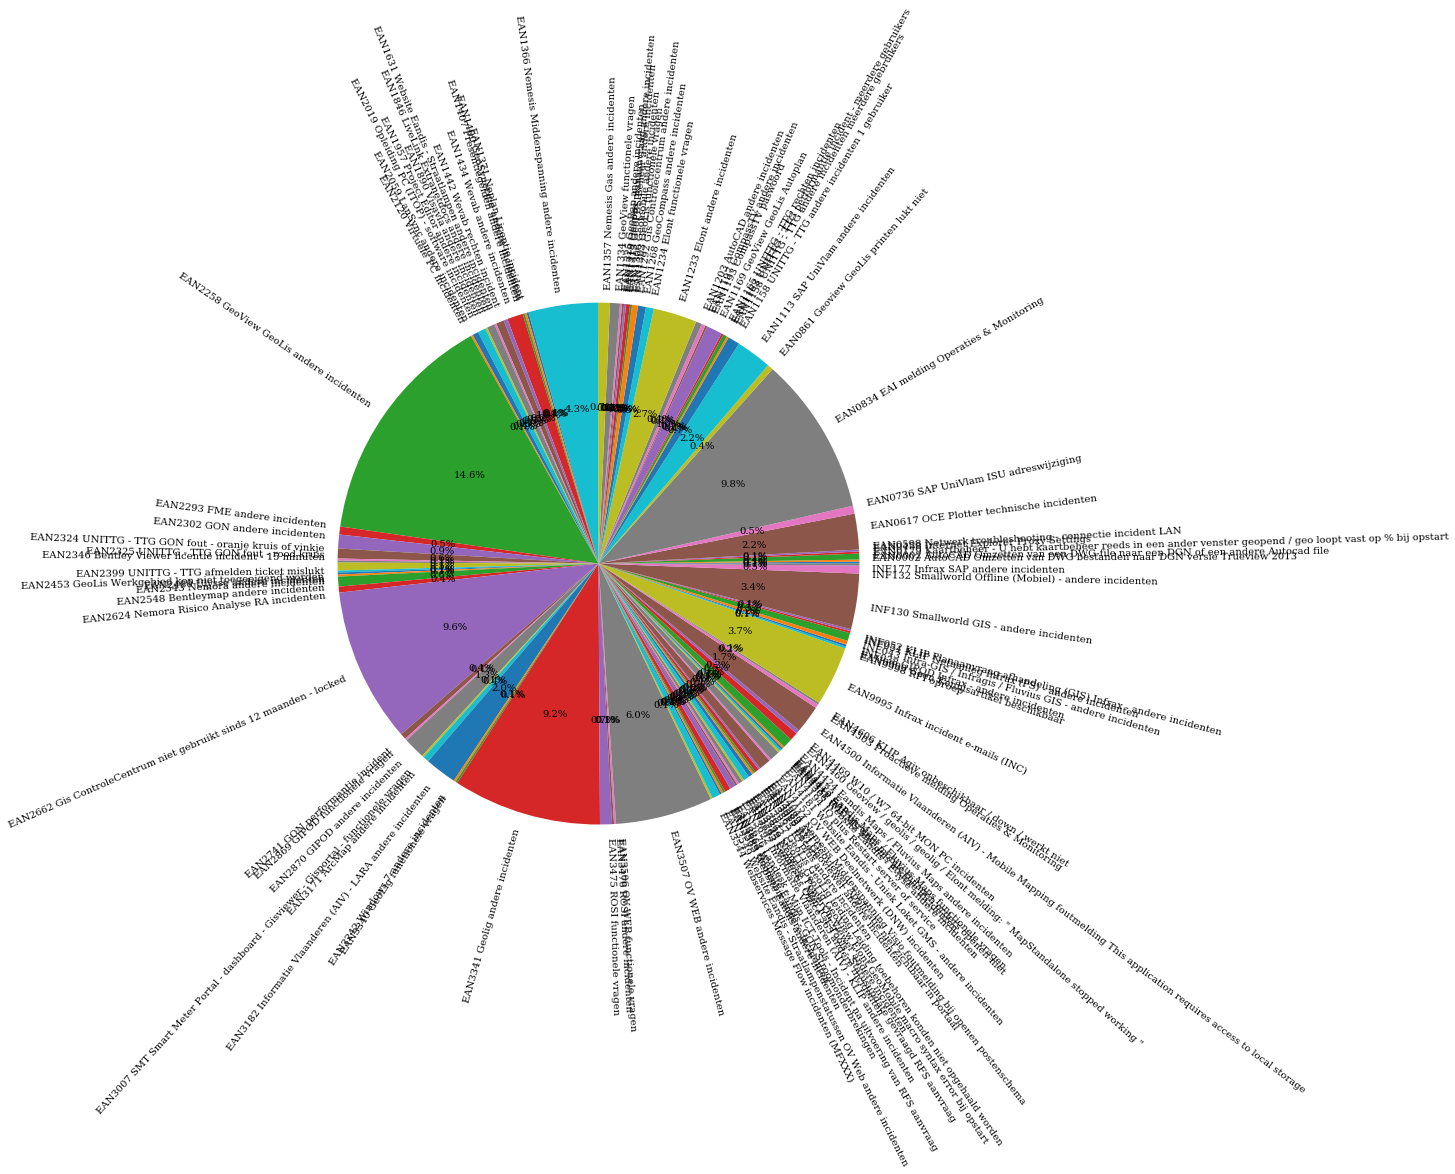

In [35]:
plt.pie(df_incidentenByArticle["Count"], labels=df_incidentenByArticle.index, autopct='%.1f%%', labeldistance=1.05, radius=3,
       rotatelabels=True)
plt.show()